<a href="https://colab.research.google.com/github/SergioManuelJob/SVM-Model-Exercise/blob/master/SVM_Model_Sergio_Manuel_Su%C3%A1rez_Su%C3%A1rez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

### Metodo para despues dibujar la gráfica

In [135]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^')
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)

    # Plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)], marker=markers[idx], label=cl)

    # Highlight test examples if provided
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='cyan',  # Providing a color for the test set points
                    edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='Test Set')

### Cargamos los datos y los escalamos apropiadamente.

In [136]:
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### Entrenamiento del modelo

In [138]:
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)

SVC()

### Acurracy del modelo:

In [139]:
svm_classifier.score(X_test, y_test)

0.9777777777777777

### Y predicciones finales del modelo:

In [140]:
print("Los valores predichos: " + str(svm_classifier.predict(X_test)))
print("Los valores verdaderos: " + str(y_test))

Los valores predichos: [2 0 0 1 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]
Los valores verdaderos: [2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]


### Con este código observamos que solamente hay 3 tipos de flores en el dataset, que son la cantidad de grupos que se han creado, como vamos a ver en la siguiente gráfica

In [141]:
y2 = iris.target
y2 = pd.DataFrame(y)
y2[0].unique()

array([0, 1, 2])

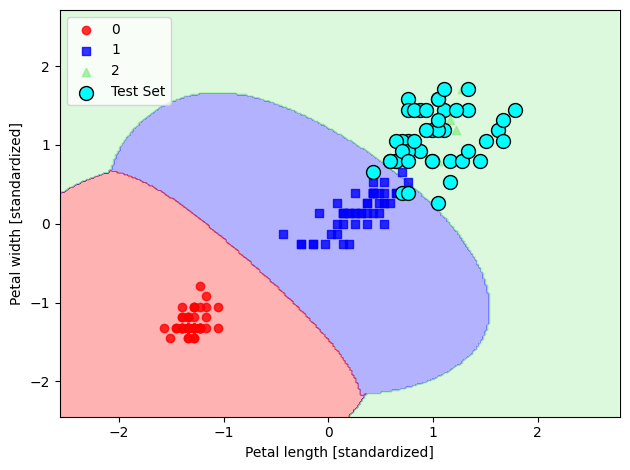

In [142]:
plot_decision_regions(X, y, classifier=svm_classifier, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()